
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualizing the Time Series Data
* Making the time series data stationary
* Plotting the Correlation and AutoCorrelation Charts
* Constructing the ARIMA Model or Seasonal ARIMA based on the data
* Using the model to make predictions



In [45]:
# Importing libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [46]:
# reading dataset 
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [47]:
# Top 5 data 
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [48]:
# Last 5 data 
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [49]:
## Cleaning  the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [50]:
# checking for the null data 
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [51]:
## Dropping last 2 rows
df.drop(106,axis=0,inplace=True)

In [52]:
# last 5 data 
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [53]:
# Dropping data 
df.drop(105,axis=0,inplace=True)

In [54]:
#Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [55]:
# last 5 data
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [56]:
# Converting Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [57]:
#Checking for the date time 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [58]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [59]:
# setting index to month 
df.set_index('Month',inplace=True)

In [60]:
# top 5 data 
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [61]:
# statistical description of data 
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Step 2: Visualizing the Data

In [62]:
import plotly.express as px
# Setting up Plotly for interactive notebook output
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
# Resampling the data to get monthly totals
monthly_df = df.resample('M').sum()

# Creating an interactive line plot
fig = px.line(monthly_df, x=monthly_df.index, y='Sales', title='Monthly Sales Plot')
fig.update_xaxes(title_text='Month')  #x axis
fig.update_yaxes(title_text='Sales')  # y axis
fig.show()

### Testing For Stationarity

In [63]:
# checking for null and alternate hypothesis
from statsmodels.tsa.stattools import adfuller

The adfuller function is a part of the statsmodels library in Python, specifically in the module tsa.stattools. It stands for Augmented Dickey-Fuller test, which is a statistical test used to determine whether a given time series data has a unit root, or in other words, whether it is stationary or non-stationary.

Stationarity is an important concept in time series analysis. A stationary time series is one whose statistical properties, such as mean, variance, and autocorrelation, remain constant over time. Non-stationary time series, on the other hand, exhibit trends or other patterns that change over time.

The Augmented Dickey-Fuller (ADF) test is commonly used to check for stationarity. It tests the null hypothesis that a unit root is present in a time series against the alternative hypothesis of stationarity. The unit root presence indicates that the time series is non-stationary.

In [64]:
# testing for sales data if it is stationary or not 
test_result=adfuller(df['Sales'])

1. Null Hypothesis : data is non stationary 
2. Alternative Hypothesis : data is stationary

p value = 0.36391577

# p < 0.05  --reject null hypothesis

# p > 0.05  --accept the null hypothesis

In [65]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

## Documentation part

1. def adfuller_test(sales):: This line defines a function named adfuller_test that takes a single argument (sales) which is the time series data you want to test for stationarity.

2. result = adfuller(sales): The adfuller function is called on the sales data to perform the ADF test. The results of the test are stored in the result variable.

3. `labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']`: This list defines the labels that correspond to different statistical outputs of the ADF test.

4. The `for value, label in zip(result, labels):` loop iterates through the `result` values and their corresponding `labels`, printing them out in a formatted manner.

5. `if result[1] <= 0.05:`: This conditional statement checks if the p-value (`result[1]`) is less than or equal to 0.05, which is a common significance level. If the p-value is below this threshold, the code interprets it as strong evidence against the null hypothesis (indicating stationarity) and prints the appropriate message. If the p-value is greater than 0.05, the code interprets it as weak evidence against the null hypothesis (indicating non-stationarity) and prints a different message.

In [66]:
#Passing the parameter
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276195
p-value : 0.3639157716602467
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


1.  To summarize it computes the ADF test on the 'Sales' data and provides you with insights into whether the data is stationary or non-stationary based on the test results.

## Differencing

1.This transformation is known as the first difference and is often used to convert a non-stationary time series into a stationary one. The idea is that differencing can remove trends and make the data stationary, which is often a requirement for various time series analysis methods.

In [67]:
# Creating new column 
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [68]:
df['Sales'].shift(1)
# calculating the lagged version of the 'Sales' column by shifting it by one time step.

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [69]:
# finding the seasonal first difference
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [70]:
# top 14 data 
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [71]:
## Again testing dickey fuller test for stationary
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [72]:
# Using plotly for interactivenes of seasonal first difference
fig = px.line(df, x=df.index, y='Seasonal First Difference', title='Interactive Seasonal First Difference Plot')
fig.show()

## Auto Regressive Model
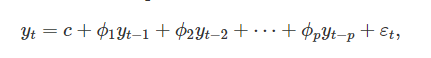

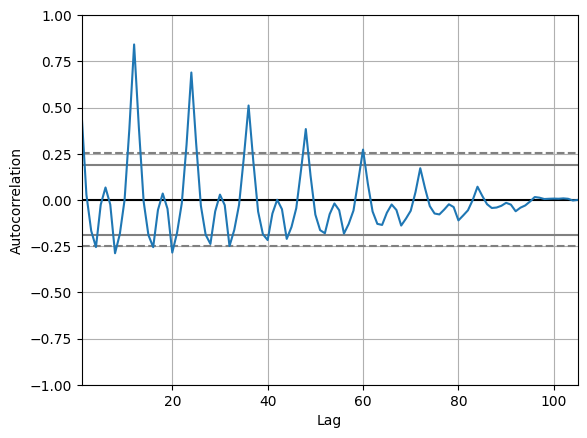

In [73]:
# Creating Autocorrelation plot 
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()





### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    * p AR model lags
    * d differencing
    * q MA lags

In [74]:
# Library for auto correlation and partial auto correlation 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

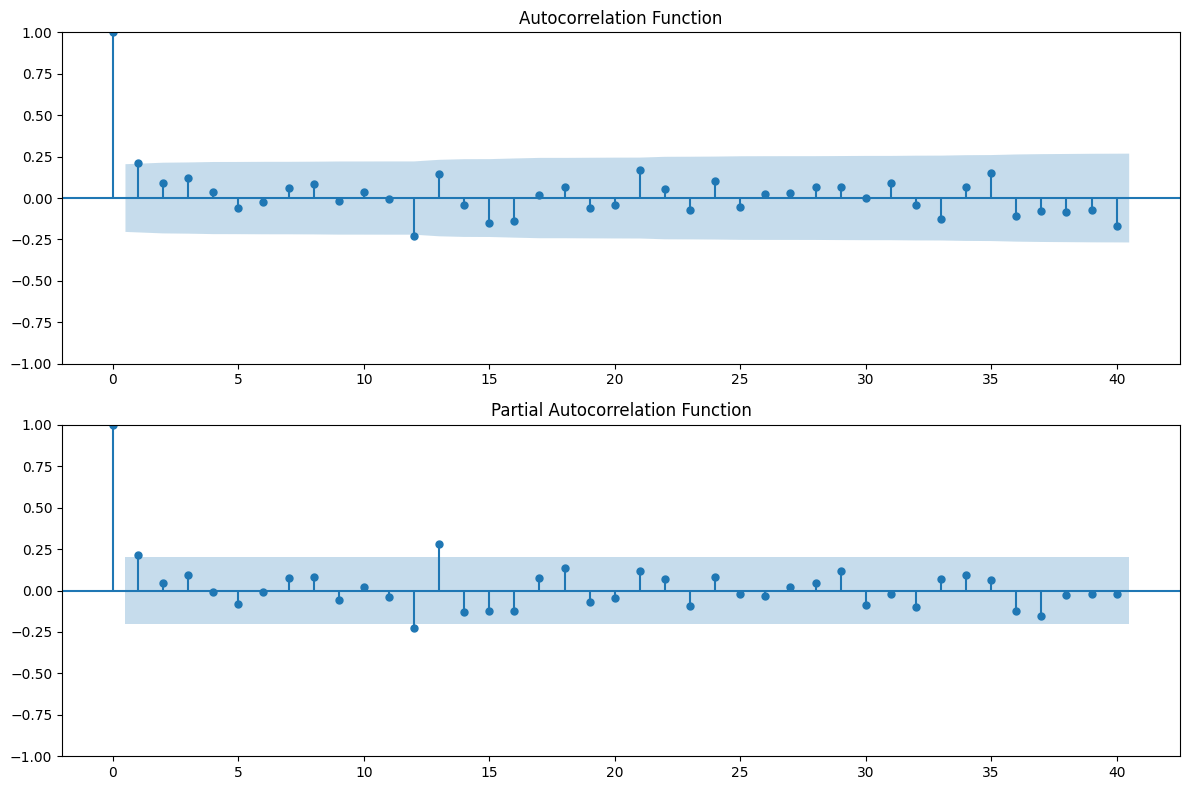

In [75]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot autocorrelation function
plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax1.set_title('Autocorrelation Function')

# Plot partial autocorrelation function
plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()



In [76]:
# For non-seasonal data
# seasonal differentiating is done only 1 time so d value is 1 
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [77]:
# Fit an ARIMA model
model = ARIMA(df['Sales'], order=(1, 1, 1))
model_fit = model.fit()



c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [78]:
# Obtaining the summary of the model 
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Mon, 14 Aug 2023   AIC                           1911.627
Time:                        19:45:07   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: xlabel='Month'>

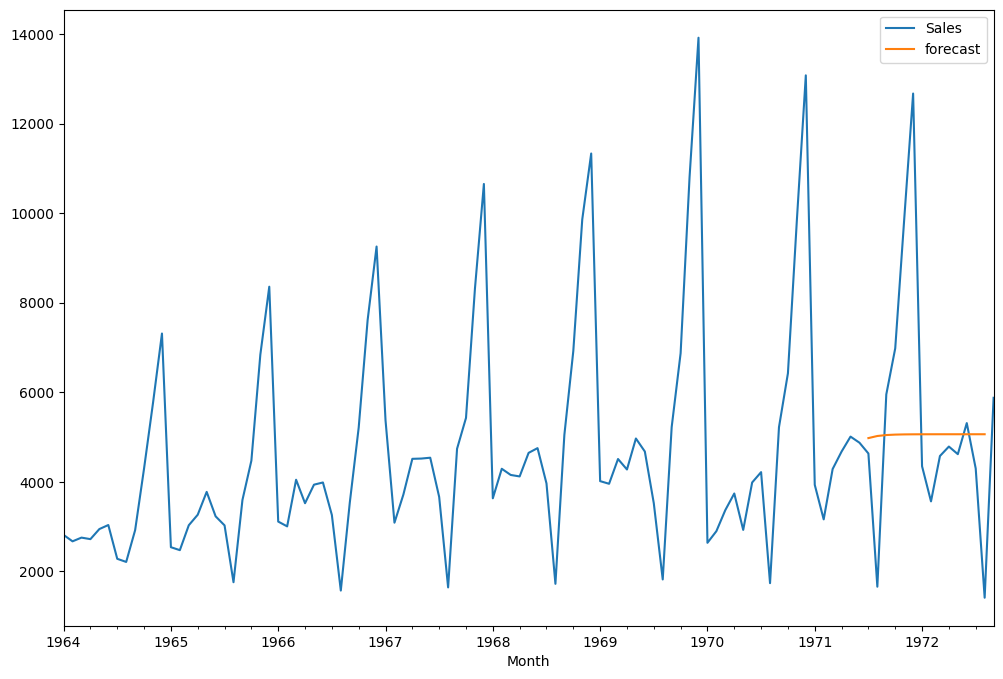

In [79]:
#here we forecast the future value
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

## Seasonal Arima

In [80]:

import statsmodels.api as sm

In [81]:
# sarimax algorithm
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<AxesSubplot: xlabel='Month'>

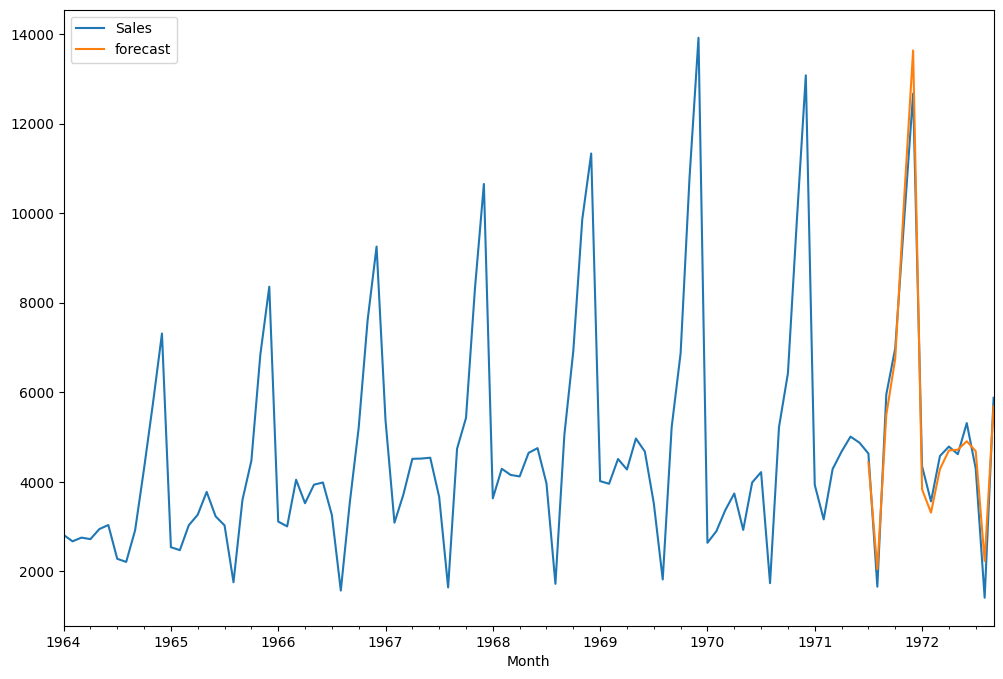

In [82]:
# plotting with sarimax 
df['forecast']=results.predict(start=90,end=104,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [83]:
import plotly.graph_objs as go
import ipywidgets as widgets
from IPython.display import display
import statsmodels.api as sm

# Assuming you have already defined and fitted the SARIMAX model 'results'

def plot_forecast(start, end):
    df['forecast'] = results.predict(start=start, end=end, dynamic=True)
    
    trace_actual = go.Scatter(x=df.index, y=df['Sales'], mode='lines', name='Actual')
    trace_forecast = go.Scatter(x=df.index, y=df['forecast'], mode='lines', name='Forecast')
    
    layout = go.Layout(title='Sales Forecast',
                       xaxis=dict(title='Date'),
                       yaxis=dict(title='Sales'))
    
    fig = go.Figure(data=[trace_actual, trace_forecast], layout=layout)
    fig.show()

start_slider = widgets.IntSlider(value=90, min=0, max=len(df)-1, step=1, description='Start:')
end_slider = widgets.IntSlider(value=104, min=0, max=len(df)-1, step=1, description='End:')
interactive_plot = widgets.interactive(plot_forecast, start=start_slider, end=end_slider)
display(interactive_plot)


interactive(children=(IntSlider(value=90, description='Start:', max=104), IntSlider(value=104, description='En…

## Making furure prediction

In [84]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [85]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [86]:
# Generating future data for forecasting
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [87]:
future_df=pd.concat([df,future_datest_df])

In [88]:
import plotly.graph_objs as go
import ipywidgets as widgets
from IPython.display import display
from pandas.tseries.offsets import DateOffset
import pandas as pd
import statsmodels.api as sm
import ipywidgets as widgets



def plot_forecast(start, end):
    # Generate future dates for 7 years (84 months)
    future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1, 85)]
    future_datest_df = pd.DataFrame(index=future_dates, columns=df.columns)
    
    # Generating future data for forecasting
    future_df = pd.concat([df, future_datest_df])
    
    # Forecasting future sales
    future_df['forecast'] = results.predict(start=start, end=end, dynamic=True)
    
    trace_actual = go.Scatter(x=future_df.index, y=future_df['Sales'], mode='lines', name='Actual')
    trace_forecast = go.Scatter(x=future_df.index, y=future_df['forecast'], mode='lines', name='Forecast')
    
    layout = go.Layout(title='Sales Forecast',
                       xaxis=dict(title='Date'),
                       yaxis=dict(title='Sales'))
    
    fig = go.Figure(data=[trace_actual, trace_forecast], layout=layout)
    fig.show()

start_slider = widgets.IntSlider(value=104, min=0, max=len(df)+84, step=1, description='Start:')
end_slider = widgets.IntSlider(value=187, min=0, max=len(df)+84, step=1, description='End:')
interactive_plot = widgets.interactive(plot_forecast, start=start_slider, end=end_slider)
display(interactive_plot)


interactive(children=(IntSlider(value=104, description='Start:', max=189), IntSlider(value=187, description='E…

## Accuracy Metrics

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculating accuracy metrics
start_idx = 104  
end_idx = len(future_df) - 1    

start_date = future_df.index[start_idx]
end_date = future_df.index[end_idx]

actual_values = future_df.loc[start_date:end_date, 'Sales']
forecasted_values = future_df.loc[start_date:end_date, 'forecast']

# Dropping NaN values from the arrays
actual_values = actual_values.dropna()
forecasted_values = forecasted_values.dropna()

# Checking if any NaN values remain after dropping
if actual_values.isnull().any() or forecasted_values.isnull().any():
    print("Warning: NaN values are present after removing missing values.")
else:
    # Calculating accuracy metrics
    mae = mean_absolute_error(actual_values, forecasted_values)
    mse = mean_squared_error(actual_values, forecasted_values)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual_values - forecasted_values) / actual_values)) * 100
    
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Error (MAE): 190.44
Mean Squared Error (MSE): 36268.13
Root Mean Squared Error (RMSE): 190.44
Mean Absolute Percentage Error (MAPE): 3.24%




1. Mean Absolute Error (MAE): 190.44
   - MAE represents the average absolute difference between the actual sales values and the forecasted sales values. 
   - In this, the average difference between the actual and forecasted sales is 190.44 units.
   - MAE is easy to interpret and understand. Smaller values of MAE indicate better accuracy.

2. Mean Squared Error (MSE): 36268.13
   - MSE is the average of the squared differences between the actual and forecasted sales values.
   - It gives more weight to larger errors because of the squared term.
   - The value of MSE is 36268.13, indicating the overall magnitude of errors.

3. Root Mean Squared Error (RMSE): 190.44
   - RMSE is the square root of MSE. It represents the average magnitude of the errors.
   - Like MAE, RMSE measures the accuracy of the model's predictions, but it penalizes larger errors more heavily.
   - The value of RMSE matches the MAE in this case, which is unusual. It's possible that the squared term in MSE is playing a role.

4. Mean Absolute Percentage Error (MAPE): 3.24
   - MAPE measures the average percentage difference between the actual and forecasted sales values.
   - The value of 3.24% indicates that, on average, the forecasted sales values are off by about 3.24% from the actual sales values.

* Interpretation:
- The model's performance seems relatively decent. MAE and RMSE being close suggests that the distribution of errors might be fairly symmetric.
- The MAPE of 3.24% indicates that, on average, the model's sales predictions are around 3.24% off from the actual values.

